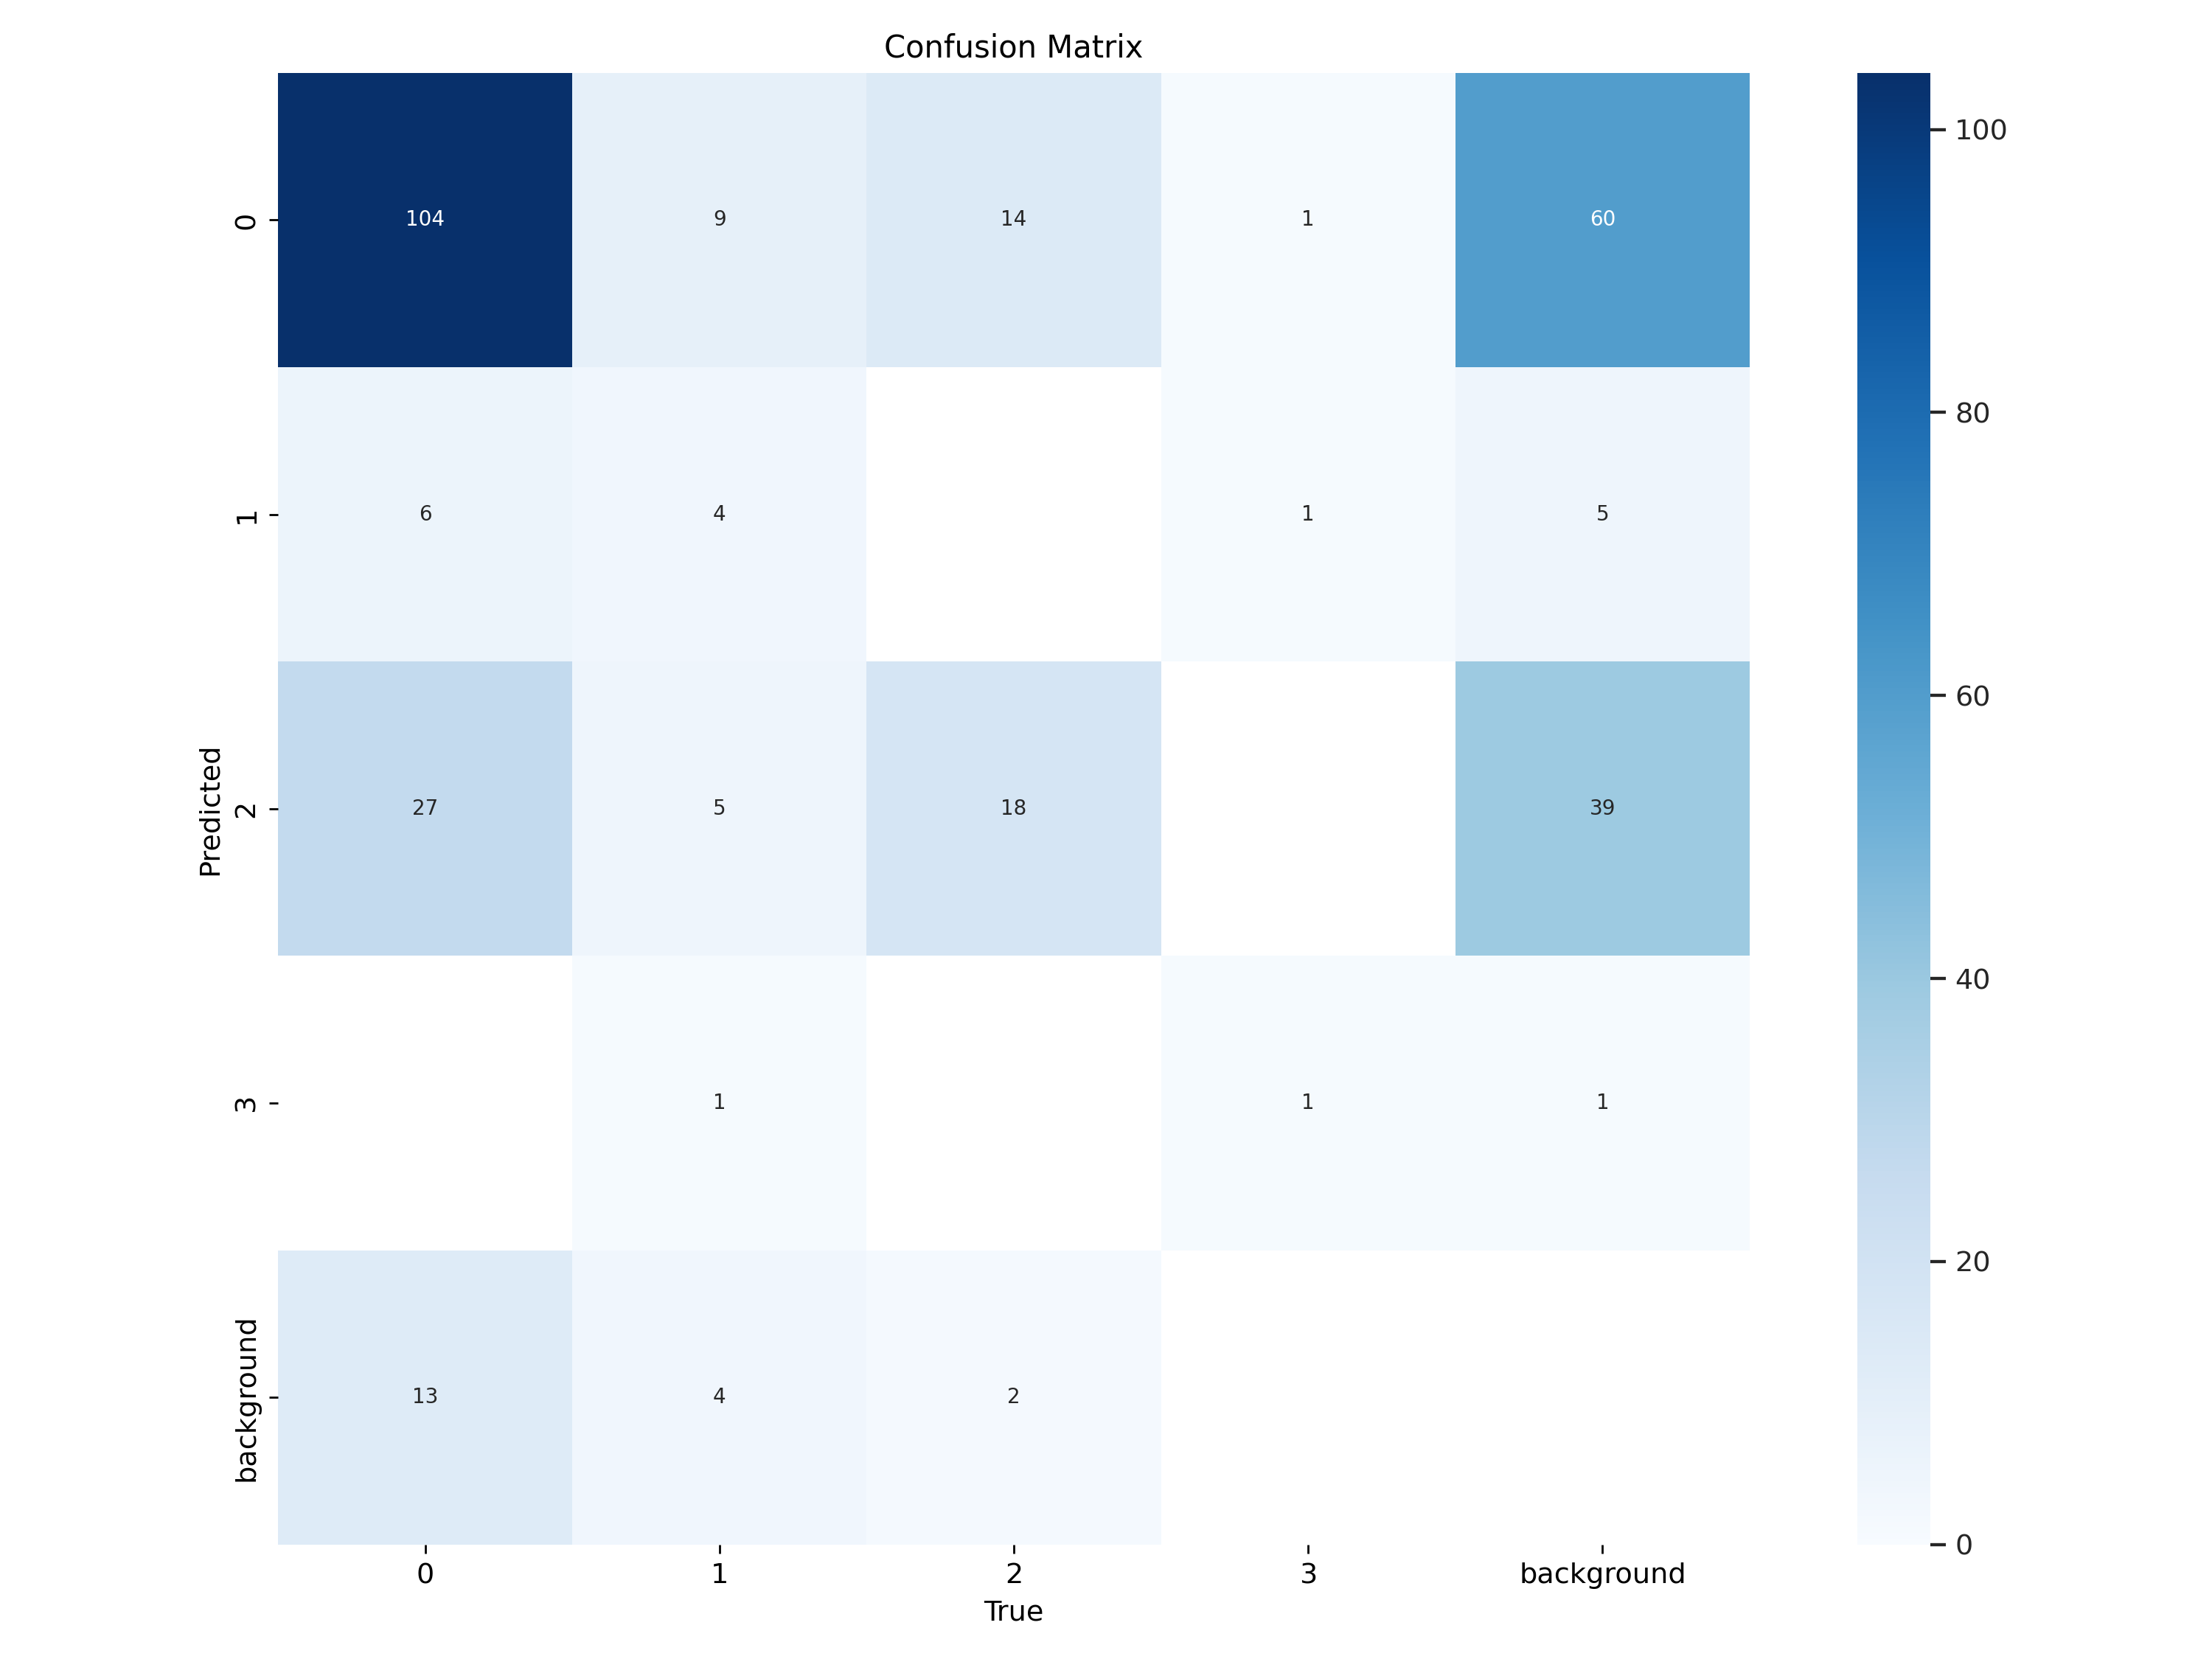

In [1]:
from IPython.display import Image

Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

In [2]:
Image(filename=f'runs/detect/train/results.png', width=600)

In [3]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [4]:
# Check the metrics provided
import pandas as pd

df = pd.read_csv(f'runs/detect/train/results.csv')
df.tail()

epoch           train/box_loss           train/cls_loss  \
5                        6                   1.2825                   1.3350   
6                        7                   1.2782                   1.3572   
7                        8                   1.2654                   1.2955   
8                        9                   1.2631                   1.3055   
9                       10                   1.2308                   1.3024   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
5                   1.2031                  0.30702                  0.58825   
6                   1.2241                  0.29947                  0.57143   
7                   1.1802                  0.32144                  0.58816   
8                   1.1753                  0.34250                  0.56876   
9                   1.1861                  0.32898                  0.46739   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
5                  0.33396                  0.20881                   1.3515   
6                  0.33411                  0.21045                   1.3517   
7                  0.34258                  0.21261                   1.3562   
8                  0.35351                  0.22275                   1.3528   
9                  0.35297                  0.22242                   1.3527   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
5                   1.4997                   1.3027                 0.000221   
6                   1.4916                   1.2959                 0.000208   
7                   1.4729                   1.3000                 0.000180   
8                   1.4459                   1.2932                 0.000138   
9                   1.4326                   1.2929                 0.000080   

                    lr/pg1                   lr/pg2  
5                 0.000221                 0.000221  
6                 0.000208                 0.000208  
7                 0.000180                 0.000180  
8                 0.000138                 0.000138  
9                 0.000080                 0.000080

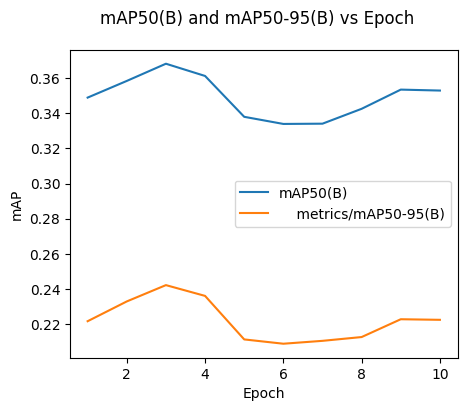

In [5]:
import matplotlib.pyplot as plt

epochs = df['                  epoch']
mAP50_B = df['       metrics/mAP50(B)']
mAP50_95_B = df['    metrics/mAP50-95(B)']

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(epochs, mAP50_B, label='mAP50(B)')
ax.plot(epochs, mAP50_95_B, label='    metrics/mAP50-95(B)')
ax.set_ylabel('mAP')
ax.set_xlabel('Epoch')
ax.legend()
fig.suptitle('mAP50(B) and mAP50-95(B) vs Epoch')
plt.show()

# Phase 1 Submission

In [6]:
import os
import zipfile

def unzip_folder(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)
    print(f'The zip file {zip_filepath} has been extracted to the directory {dest_dir}')

submission_zip = './challenge_1_submission_images.zip'
submission_directory = 'challenge_1_submission_images'
if not os.path.isdir(submission_directory):
    unzip_folder(submission_zip,submission_directory)

The zip file ./challenge_1_submission_images.zip has been extracted to the directory challenge_1_submission_images


In [7]:
# Load the Model
from ultralytics import YOLO
model = YOLO('our-best-runs/detect/train/weights/best.pt')

In [8]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={0: 'undamagedresidentialbuilding', 1: 'undamagedcommercialbuilding', 2: 'damagedresidentialbuilding', 3: 'damagedcommercialbuilding'}

directory = 'challenge_1_submission_images/Validation_Data_JPEG'
directory = 'challenge_1_submission_images/Submission data'
# Directory to store outputs
results_directory = 'Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.cpu().numpy().tolist()
            clss_list = r.boxes.cls.cpu().numpy().tolist()
            original_list = clss_list
            updated_list = []
            for element in original_list:
                 updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.cpu().numpy()
        confidences = conf_list
        class_names = updated_list

        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")

challenge_1_submission_images/Submission data/Validation_Post_Event_006.jpg
Making a prediction on  Validation_Post_Event_006.jpg



image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_006.jpg: 512x512 32 0s, 1 1, 13 2s, 3 3s, 5.7ms
Speed: 1.3ms preprocess, 5.7ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_012.jpg: 512x512 22 0s, 2 1s, 9 2s, 1 3, 5.0ms
Speed: 0.9ms preprocess, 5.0ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_005.jpg: 512x512 30 0s, 3 2s, 5.5ms
Speed: 0.7ms preprocess, 5.5ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels

image 1/1 /

Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_012.jpg
Making a prediction on  Validation_Post_Event_012.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_005.jpg
Making a prediction on  Validation_Post_Event_005.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_004.jpg
Making a prediction on  Validation_Post_Event_004.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_007.jpg
Making a prediction on  Validation_Post_Event_007.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_009.jpg
Making a prediction on  Validation_Post_Event_009.jp

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_009.jpg: 512x512 14 0s, 3 1s, 1 2, 4 3s, 5.6ms
Speed: 0.9ms preprocess, 5.6ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
7 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_010.jpg: 512x512 6 0s, 2 1s, 4 2s, 7 3s, 4.8ms
Speed: 0.8ms preprocess, 4.8ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
8 labels saved to runs/detect/predict/labels

image 1/1 /home/tham/Desktop/delete/EY/challenge_1_submission_images/Submission data/Validation_Post_Event_011.jpg: 512x512 5 0s, 2 1s, 2 2s, 6.5ms
Speed: 0.8ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
9 labels saved to runs/detect/predict/labels

image 1

Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_010.jpg
Making a prediction on  Validation_Post_Event_010.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_011.jpg
Making a prediction on  Validation_Post_Event_011.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_003.jpg
Making a prediction on  Validation_Post_Event_003.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_008.jpg
Making a prediction on  Validation_Post_Event_008.jpg
Output files generated successfully.
challenge_1_submission_images/Submission data/Validation_Post_Event_001.jpg
Making a prediction on  Validation_Post_Event_001.jpg
Output files generated successfully.


In [9]:
import shutil

# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory Validation_Data_Results has been successfully zipped into submission.
